# Linear regression

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

print(X.shape, y.shape)

(13, 1) (13, 1)


In [6]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((X, one), axis = 1)

Regression equation: y = 0.5592049619396677 * x +  -33.73541020580778


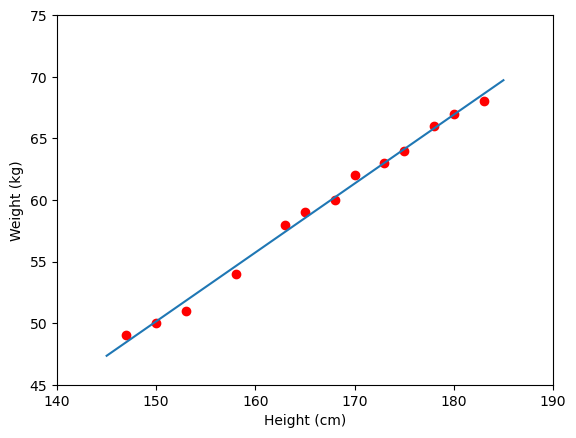

In [7]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

a = float(regr.coef_[:, 0])
b = float(regr.coef_[:, 1])
print( 'Regression equation: y =', a, '* x + ', b)

x0 = np.linspace(145, 185, 2)
y0 = a*x0 + b

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# Polinomial regression

In [9]:
import pandas as pd

In [11]:
f = pd.read_excel('data.xlsx')

x_data= f['y_bTo'].values
y_data= np.abs(f['Error_x'].values)

<BarContainer object of 50 artists>

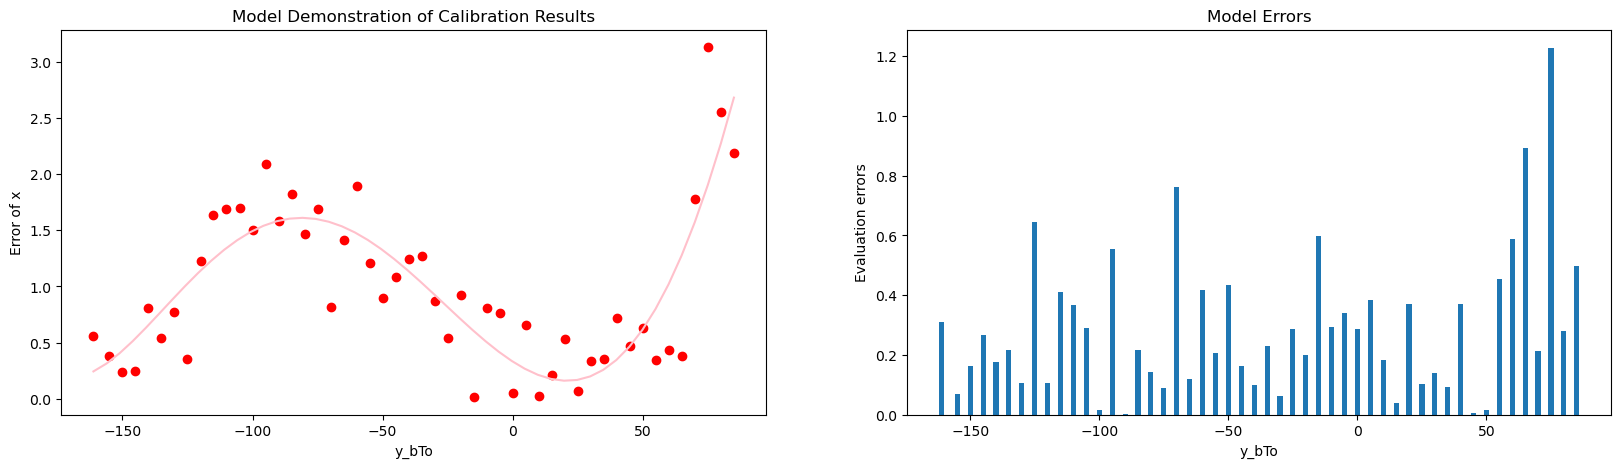

In [19]:
poly_regression_model = np.poly1d(np.polyfit(x_data, y_data, 5))
line = np.linspace(np.min(x_data), np.max(x_data), np.size(x_data))

fig, (ax,ax2) = plt.subplots(ncols=2, sharey=False, figsize=(20,5))
ax.set_xlabel('y_bTo')
ax.set_ylabel('Error of x')
ax.set_title('Model Demonstration of Calibration Results')
ax2.set_xlabel('y_bTo')
ax2.set_ylabel('Evaluation errors')
ax2.set_title('Model Errors')
ax.scatter(x_data, y_data, color='red')
# ax.bar(x_data, y_data, color='pink' , width=2)
ax.plot(line, poly_regression_model(line), color='pink')
ax2.bar(x_data, np.abs(poly_regression_model(line) - y_data), width=2)